<a href="https://colab.research.google.com/github/Vanshika004/Fake-Real-News-classification/blob/main/Fake_%26_Real_News_classification_(group_project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("This case study is being done by Group 5.")
print("Topic - Real vs Fake News Classsification")
print("The students who contributed to this case study are as following - ")
print("For Case Study 01")
print("21801012023 - Vanshika - Dataset collection and cleaning")
print("21501012023 - Vaishnavi - Stemming and lemmatization")
print("22201012023 - Vidushi Mehra - Preprocess the data")
print("For Case Study 02")
print("21401012023 - Urvashi Yadav - BoW and TF-IDF")
print("21101012023 - Twinkle Kotnala - Word2Vec")
print("21201012023 - Udiksha Solanki - FloVe")
print("For Case Study 03")
print("22901012023 - Zoya Rizvi - ANN Model")
print("21301012023 - Urvashi Singh - Genetic Algorithm")
print("22701012023 - Yogita - Hybrid Model")

This case study is being done by Group 5.
Topic - Real vs Fake News Classsification
The students who contributed to this case study are as following - 
For Case Study 01
21801012023 - Vanshika - Dataset collection and cleaning
21501012023 - Vaishnavi - Stemming and lemmatization
22201012023 - Vidushi Mehra - Preprocess the data
For Case Study 02
21401012023 - Urvashi Yadav - BoW and TF-IDF
21101012023 - Twinkle Kotnala - Word2Vec
21201012023 - Udiksha Solanki - FloVe
For Case Study 03
22901012023 - Zoya Rizvi - ANN Model
21301012023 - Urvashi Singh - Genetic Algorithm
22701012023 - Yogita - Hybrid Model


In [ ]:
print("21801012023 - Vanshika - Start\n")
import pandas as pd

real_url = "https://raw.githubusercontent.com/Vanshika004/Fake-Real-News-classification/main/gossipcop_real.csv"
fake_url = "https://raw.githubusercontent.com/Vanshika004/Fake-Real-News-classification/main/gossipcop_fake.csv"

real_df = pd.read_csv(real_url)
fake_df = pd.read_csv(fake_url)

print(real_df.head())
print(fake_df.head())

21801012023 - Vanshika - Start

                 id                                           news_url  \
0  gossipcop-882573  https://www.brides.com/story/teen-mom-jenelle-...   
1  gossipcop-875924  https://www.dailymail.co.uk/tvshowbiz/article-...   
2  gossipcop-894416        https://en.wikipedia.org/wiki/Quinn_Perkins   
3  gossipcop-857248  https://www.refinery29.com/en-us/2018/03/19192...   
4  gossipcop-884684  https://www.cnn.com/2017/10/04/entertainment/c...   

                                               title  \
0  Teen Mom Star Jenelle Evans' Wedding Dress Is ...   
1  Kylie Jenner refusing to discuss Tyga on Life ...   
2                                      Quinn Perkins   
3  I Tried Kim Kardashian's Butt Workout & Am For...   
4  Celine Dion donates concert proceeds to Vegas ...   

                                           tweet_ids  
0  912371411146149888\t912371528343408641\t912372...  
1  901989917546426369\t901989992074969089\t901990...  
2  931263637246881792

In [ ]:
fake_df["label"] = 1   # fake = 1
real_df["label"] = 0   # real = 0

In [ ]:
fake_df= fake_df[["title", "label"]]
real_df= real_df[["title", "label"]]

In [ ]:
print("Real count:", len(real_df))
print("Fake count:", len(fake_df))

Real count: 16817
Fake count: 5323


In [ ]:
from sklearn.utils import resample

# Majority class = real
real_majority = real_df

# Minority class = fake
fake_minority = fake_df

# Undersample the majority class to match minority count
real_undersampled = resample(real_majority,
                             replace=False,
                             n_samples=len(fake_minority),
                             random_state=42)

# Combine undersampled majority + minority
balanced_df = pd.concat([real_undersampled, fake_minority])

# Shuffle
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print("Balanced Dataset Size:", balanced_df['label'].value_counts())


Balanced Dataset Size: label
0    5323
1    5323
Name: count, dtype: int64


In [ ]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)       # remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)          # remove punctuation + numbers
    text = re.sub(r"\s+", " ", text).strip()         # remove extra spaces
    return text

balanced_df["clean_title"] = balanced_df["title"].apply(clean_text)

balanced_df.head()

,title,label,clean_title
0,Yara Shahidi Stars in black-ish Spinoff grown-ish,0,yara shahidi stars in blackish spinoff grownish
1,"Joan Rivers, Shonda Rhimes among Television Ac...",0,joan rivers shonda rhimes among television aca...
2,Gwen Stefani Supporting Blake Shelton To Kick ...,1,gwen stefani supporting blake shelton to kick ...
3,Animatronic Trump joins Disney's Hall of Presi...,0,animatronic trump joins disneys hall of presid...
4,Welcome to the official website for the nation...,1,welcome to the official website for the nation...


In [ ]:
balanced_df[["title", "clean_title"]].head(10)

,title,clean_title
0,Yara Shahidi Stars in black-ish Spinoff grown-ish,yara shahidi stars in blackish spinoff grownish
1,"Joan Rivers, Shonda Rhimes among Television Ac...",joan rivers shonda rhimes among television aca...
2,Gwen Stefani Supporting Blake Shelton To Kick ...,gwen stefani supporting blake shelton to kick ...
3,Animatronic Trump joins Disney's Hall of Presi...,animatronic trump joins disneys hall of presid...
4,Welcome to the official website for the nation...,welcome to the official website for the nation...
5,Why Jennifer Aniston's breakup with Justin The...,why jennifer anistons breakup with justin ther...
6,"Story About Khloe Kardashian ""Guilty Over Happ...",story about khloe kardashian guilty over happy...
7,Bethenny Frankel and Fredrik Eklund Show on Bravo,bethenny frankel and fredrik eklund show on bravo
8,Russell Wilson Returns to Host Nickelodeon Kid...,russell wilson returns to host nickelodeon kid...
9,'The Voice': 10 Things We Know About Gwen Stef...,the voice things we know about gwen stefani an...


In [ ]:
balanced_df.to_csv("balanced_clean_dataset.csv", index=False)

In [ ]:
import pandas as pd

df = pd.read_csv("balanced_clean_dataset.csv")
df.head()

print("\n21801012023 - Vanshika - End")


21801012023 - Vanshika - End


In [ ]:
print("21501012023 - Vaishnavi - Start\n")
!pip install -q nltk scikit-learn

import pandas as pd
import re
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import nltk

# NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')


21501012023 - Vaishnavi - Start



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv("balanced_clean_dataset.csv")
# Ensure you have 'clean_title' and 'label' columns
df = df[['clean_title', 'label']].dropna().reset_index(drop=True)
df.head()

,clean_title,label
0,yara shahidi stars in blackish spinoff grownish,0
1,joan rivers shonda rhimes among television aca...,0
2,gwen stefani supporting blake shelton to kick ...,1
3,animatronic trump joins disneys hall of presid...,0
4,welcome to the official website for the nation...,1


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
STOP = set(stopwords.words('english'))

def tokenize(text, remove_stopwords=False):
    # Basic tokenization + keep alpha tokens
    tokens = word_tokenize(str(text))
    toks = [t for t in tokens if t.isalpha()]
    if remove_stopwords:
        toks = [t for t in toks if t not in STOP]
    return toks


In [ ]:
for i, txt in df['clean_title'].head(5).items():
    tokens = tokenize(txt)
    print(f"Row {i}: {tokens}")


Row 0: ['yara', 'shahidi', 'stars', 'in', 'blackish', 'spinoff', 'grownish']
Row 1: ['joan', 'rivers', 'shonda', 'rhimes', 'among', 'television', 'academy', 'hall', 'of', 'fame', 'inductees']
Row 2: ['gwen', 'stefani', 'supporting', 'blake', 'shelton', 'to', 'kick', 'katy', 'perry', 'american', 'idols', 'butt', 'in', 'ratings', 'war']
Row 3: ['animatronic', 'trump', 'joins', 'disneys', 'hall', 'of', 'presidents', 'and', 'twitter', 'thinks', 'he', 'looks', 'like', 'jon', 'voight']
Row 4: ['welcome', 'to', 'the', 'official', 'website', 'for', 'the', 'nationally', 'syndicated', 'talk', 'show', 'live', 'with', 'kelly', 'and', 'ryan']


In [ ]:
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

porter = PorterStemmer()
snowball = SnowballStemmer("english")
wnl = WordNetLemmatizer()


def preview(label, tokens):
    """Show only the first 5 tokens for debugging."""
    print(f"{label} (first 5): {tokens[:5]}")


# Convert NLTK POS → WordNet POS
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN   # default fallback


# POS-aware lemmatization
def pos_lemmatize_tokens(tokens):
    tagged = pos_tag(tokens)
    preview("POS Tags", tagged[:5])

    lemmas = [wnl.lemmatize(word, get_wordnet_pos(tag))
              for word, tag in tagged]

    preview("POS Lemmatizer", lemmas)
    return lemmas


def porter_stem_tokens(tokens):
    stems = [porter.stem(t) for t in tokens]
    preview("Porter Stemmer", stems)
    return stems


def snowball_stem_tokens(tokens):
    stems = [snowball.stem(t) for t in tokens]
    preview("Snowball Stemmer", stems)
    return stems


def detokenize(tokens):
    detok = " ".join(tokens)
    print("Detokenized preview (first 5 words):", detok.split()[:5], "...")
    return detok


def process_tokens(tokens):
    print("\n----- Processing one row -----")
    preview("Original tokens", tokens)

    porter_out = porter_stem_tokens(tokens)
    snowball_out = snowball_stem_tokens(tokens)
    pos_lemma_out = pos_lemmatize_tokens(tokens)

    detok = detokenize(pos_lemma_out)

    print("FULL Detokenized text:\n", detok)
    print("--------------------------------\n")
    return detok


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

def porter_silent(tokens):
    return [porter.stem(t) for t in tokens]

def snowball_silent(tokens):
    return [snowball.stem(t) for t in tokens]

def lemma_silent(tokens):
    tagged = pos_tag(tokens)
    return [wnl.lemmatize(w, get_wordnet_pos(tag)) for w, tag in tagged]
df['tokens']         = df['clean_title'].apply(tokenize)
df['porter_tokens']  = df['tokens'].apply(porter_silent)
df['snowball_tokens']= df['tokens'].apply(snowball_silent)
df['lemma_tokens']   = df['tokens'].apply(lemma_silent)


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [ ]:
df['text_original'] = df['tokens'].apply(detokenize)
df['text_porter']   = df['porter_tokens'].apply(detokenize)
df['text_snowball'] = df['snowball_tokens'].apply(detokenize)
df['text_lemma']    = df['lemma_tokens'].apply(detokenize)


Streaming output truncated to the last 5000 lines.
Detokenized preview (first 5 words): ['beyonce', 'and', 'jayz', 'building', 'million'] ...
Detokenized preview (first 5 words): ['blake', 'shelton', 'gwen', 'stefani', 'ignore'] ...
Detokenized preview (first 5 words): ['we', 'cant', 'stop', 'watch', 'the'] ...
Detokenized preview (first 5 words): ['celebrity', 'salute', 'the', 'troop', 'on'] ...
Detokenized preview (first 5 words): ['audrina', 'patridge', 'and', 'ryan', 'cabrera'] ...
Detokenized preview (first 5 words): ['lauren', 'tom'] ...
Detokenized preview (first 5 words): ['pamela', 'anderson', 'believe', 'she', 'have'] ...
Detokenized preview (first 5 words): ['blake', 'griffin', 'warn', 'by', 'la'] ...
Detokenized preview (first 5 words): ['janet', 'jackson', 'call', 'police', 'on'] ...
Detokenized preview (first 5 words): ['watch', 'olivia', 'pierson', 'and', 'natalie'] ...
Detokenized preview (first 5 words): ['president', 'trump', 'say', 'stephen', 'curry'] ...
Detokenized

In [ ]:
df[['clean_title', 'text_original', 'text_porter', 'text_snowball', 'text_lemma']].head(10)

,clean_title,text_original,text_porter,text_snowball,text_lemma
0,yara shahidi stars in blackish spinoff grownish,yara shahidi stars in blackish spinoff grownish,yara shahidi star in blackish spinoff grownish,yara shahidi star in blackish spinoff grownish,yara shahidi star in blackish spinoff grownish
1,joan rivers shonda rhimes among television aca...,joan rivers shonda rhimes among television aca...,joan river shonda rhime among televis academi ...,joan river shonda rhime among televis academi ...,joan river shonda rhimes among television acad...
2,gwen stefani supporting blake shelton to kick ...,gwen stefani supporting blake shelton to kick ...,gwen stefani support blake shelton to kick kat...,gwen stefani support blake shelton to kick kat...,gwen stefani support blake shelton to kick kat...
3,animatronic trump joins disneys hall of presid...,animatronic trump joins disneys hall of presid...,animatron trump join disney hall of presid and...,animatron trump join disney hall of presid and...,animatronic trump join disney hall of presiden...
4,welcome to the official website for the nation...,welcome to the official website for the nation...,welcom to the offici websit for the nation syn...,welcom to the offici websit for the nation syn...,welcome to the official website for the nation...
5,why jennifer anistons breakup with justin ther...,why jennifer anistons breakup with justin ther...,whi jennif aniston breakup with justin theroux...,whi jennif aniston breakup with justin theroux...,why jennifer anistons breakup with justin ther...
6,story about khloe kardashian guilty over happy...,story about khloe kardashian guilty over happy...,stori about khloe kardashian guilti over happi...,stori about khloe kardashian guilti over happi...,story about khloe kardashian guilty over happy...
7,bethenny frankel and fredrik eklund show on bravo,bethenny frankel and fredrik eklund show on bravo,bethenni frankel and fredrik eklund show on bravo,bethenni frankel and fredrik eklund show on bravo,bethenny frankel and fredrik eklund show on bravo
8,russell wilson returns to host nickelodeon kid...,russell wilson returns to host nickelodeon kid...,russel wilson return to host nickelodeon kid c...,russel wilson return to host nickelodeon kid c...,russell wilson return to host nickelodeon kid ...
9,the voice things we know about gwen stefani an...,the voice things we know about gwen stefani an...,the voic thing we know about gwen stefani and ...,the voic thing we know about gwen stefani and ...,the voice thing we know about gwen stefani and...


In [ ]:
#Vocabulary Size Comparison
from collections import Counter

def vocab_stats(text_col):
    tokens = " ".join(df[text_col]).split()
    vocab = set(tokens)
    return len(vocab)

print("Original vocab:", vocab_stats("text_original"))
print("Porter vocab:", vocab_stats("text_porter"))
print("Snowball vocab:", vocab_stats("text_snowball"))
print("Lemma vocab:", vocab_stats("text_lemma"))


Original vocab: 12423
Porter vocab: 9184
Snowball vocab: 9166
Lemma vocab: 10451


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def evaluate(col):
    X = df[col]
    y = df['label']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1,2))
    Xtr = tfidf.fit_transform(X_train)
    Xte = tfidf.transform(X_test)

    clf = LogisticRegression(max_iter=300)
    clf.fit(Xtr, y_train)

    pred = clf.predict(Xte)
    print(f"\n=== Results using {col} ===")
    print("Accuracy:", accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))

evaluate("text_original")
evaluate("text_porter")
evaluate("text_snowball")
evaluate("text_lemma")



=== Results using text_original ===
Accuracy: 0.787793427230047
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1065
           1       0.82      0.74      0.78      1065

    accuracy                           0.79      2130
   macro avg       0.79      0.79      0.79      2130
weighted avg       0.79      0.79      0.79      2130


=== Results using text_porter ===
Accuracy: 0.7892018779342723
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1065
           1       0.81      0.75      0.78      1065

    accuracy                           0.79      2130
   macro avg       0.79      0.79      0.79      2130
weighted avg       0.79      0.79      0.79      2130


=== Results using text_snowball ===
Accuracy: 0.7896713615023474
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1065
           1       0.81      0.75      0.7

In [ ]:
df.to_csv("processed_for_feature_extraction.csv", index=False)

In [ ]:
import pandas as pd

df = pd.read_csv("processed_for_feature_extraction.csv")
df.head()

,clean_title,label,tokens,porter_tokens,snowball_tokens,lemma_tokens,text_original,text_porter,text_snowball,text_lemma
0,yara shahidi stars in blackish spinoff grownish,0,"['yara', 'shahidi', 'stars', 'in', 'blackish',...","['yara', 'shahidi', 'star', 'in', 'blackish', ...","['yara', 'shahidi', 'star', 'in', 'blackish', ...","['yara', 'shahidi', 'star', 'in', 'blackish', ...",yara shahidi stars in blackish spinoff grownish,yara shahidi star in blackish spinoff grownish,yara shahidi star in blackish spinoff grownish,yara shahidi star in blackish spinoff grownish
1,joan rivers shonda rhimes among television aca...,0,"['joan', 'rivers', 'shonda', 'rhimes', 'among'...","['joan', 'river', 'shonda', 'rhime', 'among', ...","['joan', 'river', 'shonda', 'rhime', 'among', ...","['joan', 'river', 'shonda', 'rhimes', 'among',...",joan rivers shonda rhimes among television aca...,joan river shonda rhime among televis academi ...,joan river shonda rhime among televis academi ...,joan river shonda rhimes among television acad...
2,gwen stefani supporting blake shelton to kick ...,1,"['gwen', 'stefani', 'supporting', 'blake', 'sh...","['gwen', 'stefani', 'support', 'blake', 'shelt...","['gwen', 'stefani', 'support', 'blake', 'shelt...","['gwen', 'stefani', 'support', 'blake', 'shelt...",gwen stefani supporting blake shelton to kick ...,gwen stefani support blake shelton to kick kat...,gwen stefani support blake shelton to kick kat...,gwen stefani support blake shelton to kick kat...
3,animatronic trump joins disneys hall of presid...,0,"['animatronic', 'trump', 'joins', 'disneys', '...","['animatron', 'trump', 'join', 'disney', 'hall...","['animatron', 'trump', 'join', 'disney', 'hall...","['animatronic', 'trump', 'join', 'disney', 'ha...",animatronic trump joins disneys hall of presid...,animatron trump join disney hall of presid and...,animatron trump join disney hall of presid and...,animatronic trump join disney hall of presiden...
4,welcome to the official website for the nation...,1,"['welcome', 'to', 'the', 'official', 'website'...","['welcom', 'to', 'the', 'offici', 'websit', 'f...","['welcom', 'to', 'the', 'offici', 'websit', 'f...","['welcome', 'to', 'the', 'official', 'website'...",welcome to the official website for the nation...,welcom to the offici websit for the nation syn...,welcom to the offici websit for the nation syn...,welcome to the official website for the nation...


In [ ]:
all_words_before = set(" ".join(df["clean_title"]).split())
print("Vocabulary size before:", len(all_words_before))

print("\n21501012023 - Vaishnavi - End")

Vocabulary size before: 12423

21501012023 - Vaishnavi - End


In [ ]:
print("22201012023 - Vidushi Mehra - Start\n")

import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

ps = PorterStemmer()
lemm = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# ---------------------------------------
# CLEANING
# ---------------------------------------
cleaned_text = []
for text in fake_df["title"]:
    text = str(text).lower()                                              # lowercase
    text = text.translate(str.maketrans("", "", string.punctuation))      # remove punctuation
    tokens = nltk.word_tokenize(text)                                     # tokenize
    tokens = [w for w in tokens if w not in stop_words]                   # remove stopwords
    cleaned_text.append(" ".join(tokens))

# Tokenize cleaned text
cleaned_tokens = [nltk.word_tokenize(text) for text in cleaned_text]

# ---------------------------------------
# STEMMING
# ---------------------------------------
stemmed = [[ps.stem(word) for word in tokens] for tokens in cleaned_tokens]

# ---------------------------------------
# LEMMATIZATION
# ---------------------------------------
lemmatized = [[lemm.lemmatize(word) for word in tokens] for tokens in cleaned_tokens]

print("\n✔ Cleaning completed.")
print("✔ Stemming completed.")
print("✔ Lemmatization completed.")


22201012023 - Vidushi Mehra - Start



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



✔ Cleaning completed.
✔ Stemming completed.
✔ Lemmatization completed.


Original vocab size: 7336
Stemmed vocab size: 5671
Lemmatized vocab size: 6730


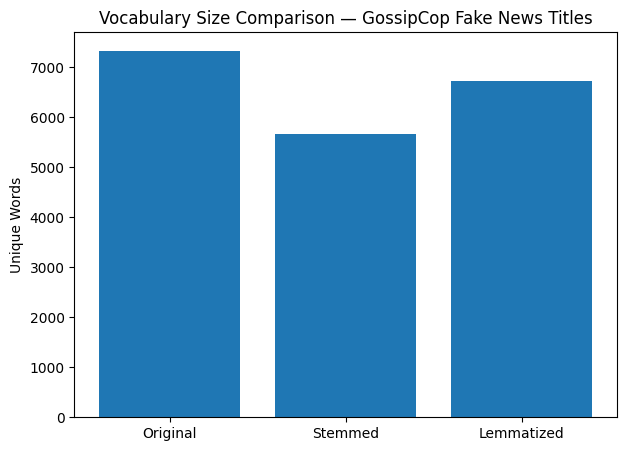

In [ ]:
# Vidushi Mehra 222010102023
# Chart 1: Vocabulary Size Comparison
# Original vocabulary
original_tokens = [word for tokens in cleaned_tokens for word in tokens]
original_vocab = set(original_tokens)

# Stemmed vocabulary
stemmed_tokens = [word for tokens in stemmed for word in tokens]
stemmed_vocab = set(stemmed_tokens)

# Lemmatized vocabulary
lemmatized_tokens = [word for tokens in lemmatized for word in tokens]
lemmatized_vocab = set(lemmatized_tokens)

print("Original vocab size:", len(original_vocab))
print("Stemmed vocab size:", len(stemmed_vocab))
print("Lemmatized vocab size:", len(lemmatized_vocab))

import matplotlib.pyplot as plt
sizes = [len(original_vocab), len(stemmed_vocab), len(lemmatized_vocab)]

plt.figure(figsize=(7,5))
plt.bar(["Original", "Stemmed", "Lemmatized"], sizes)
plt.title("Vocabulary Size Comparison — GossipCop Fake News Titles")
plt.ylabel("Unique Words")
plt.show()


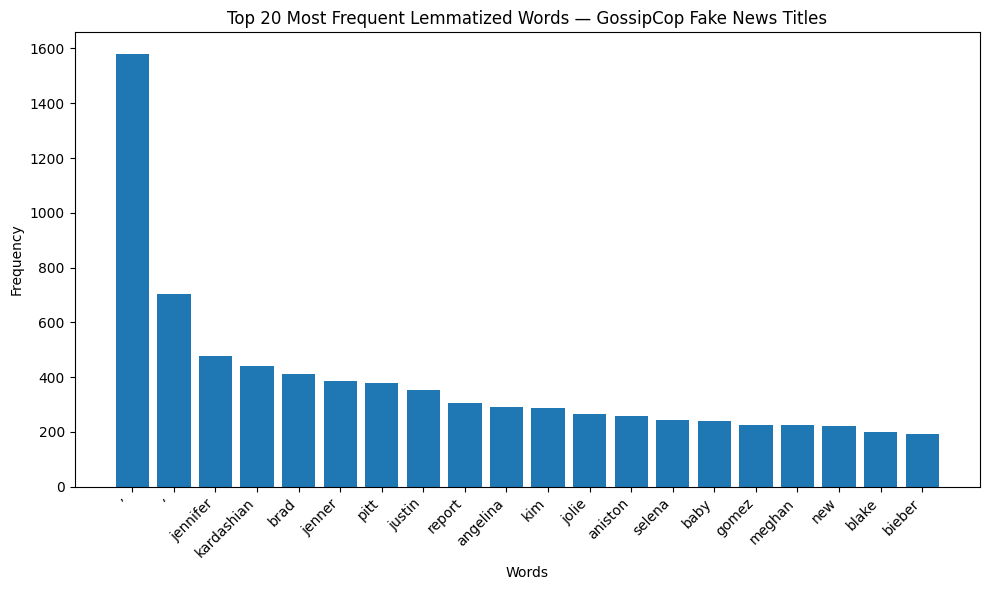


22201012023 - Vidushi Mehra - End


In [ ]:
#Vidushi Mehra 22201012023
#Top 20 Most Frequent Lemmatized Words
from collections import Counter
import matplotlib.pyplot as plt

# Flatten lemmatized tokens
all_lemma_tokens = [word for tokens in lemmatized for word in tokens]

# Count word frequency
lemma_freq = Counter(all_lemma_tokens)

# Get top 20 most common words
top20_lemma = lemma_freq.most_common(20)

# Separate words and counts for plotting
words = [item[0] for item in top20_lemma]
counts = [item[1] for item in top20_lemma]

# Plot the bar chart
plt.figure(figsize=(10,6))
plt.bar(words, counts)
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Most Frequent Lemmatized Words — GossipCop Fake News Titles")
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.tight_layout()
plt.show()


print("\n22201012023 - Vidushi Mehra - End")


21401012023 - Urvashi Yadav - Start


BoW unigram (no stopwords): 10427
BoW bigram (no stopwords): 67101
BoW unigram (stopwords removed): 10191
BoW bigram (stopwords removed): 56552


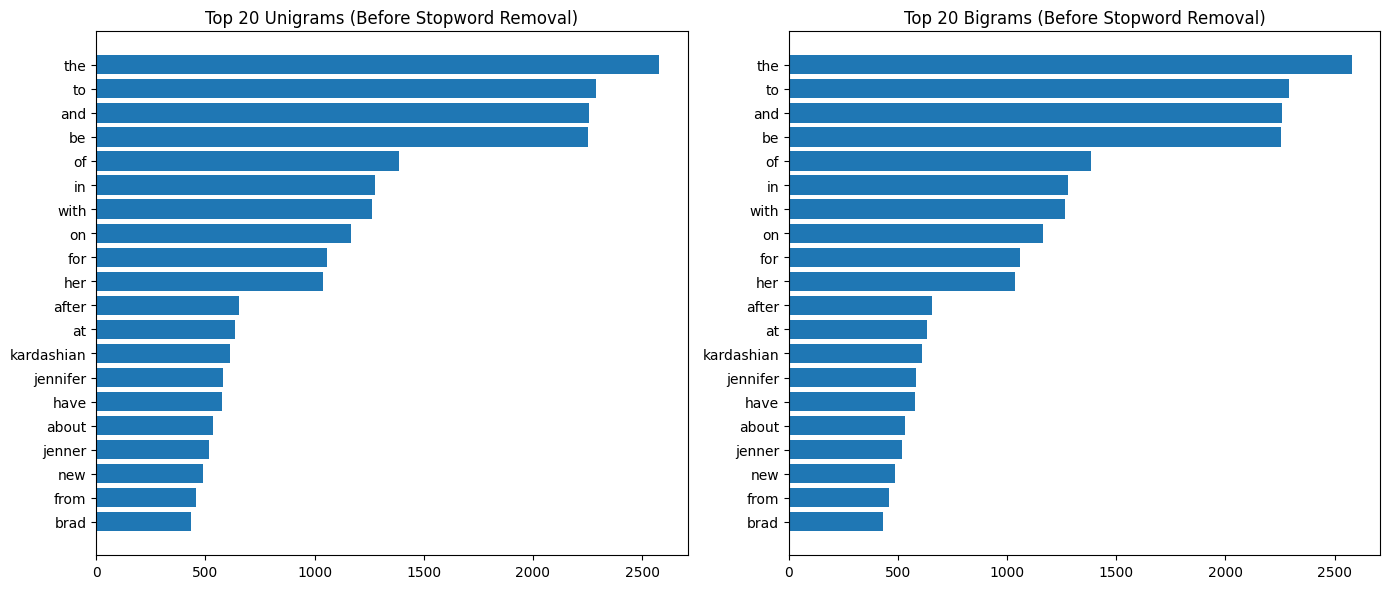

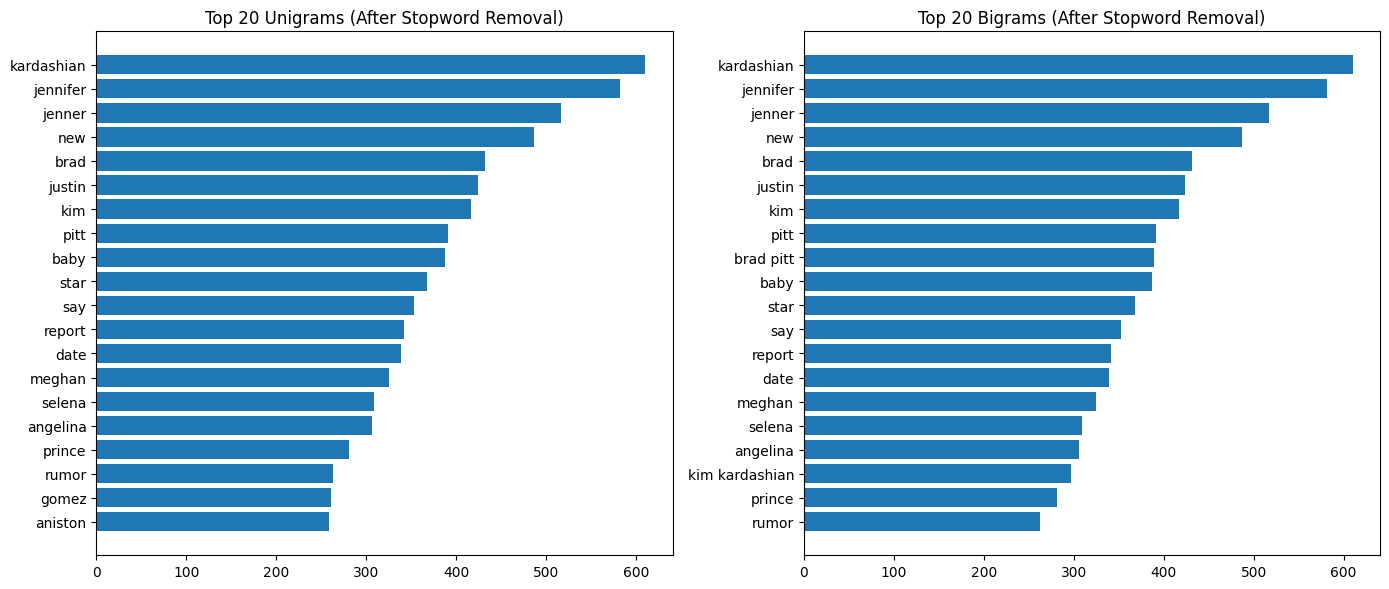

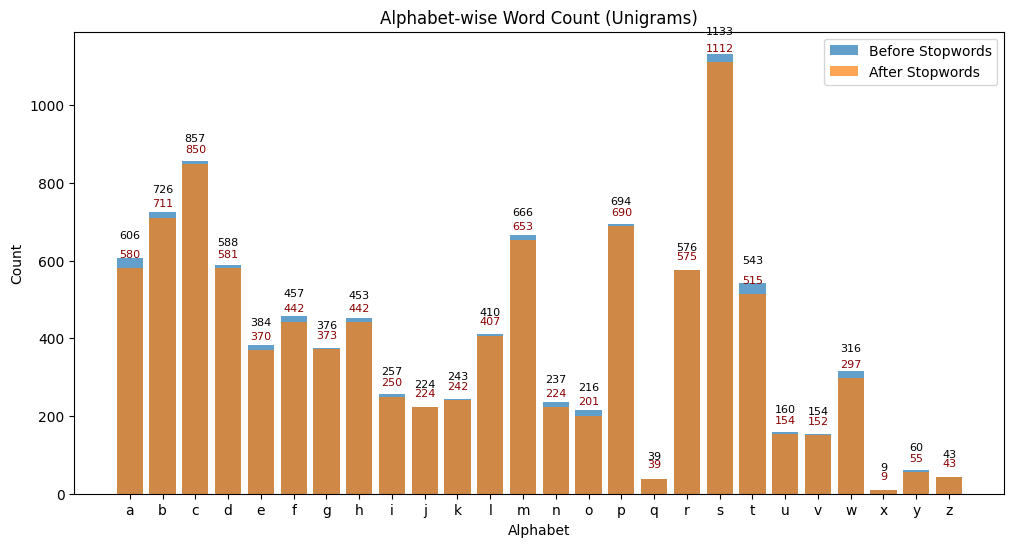

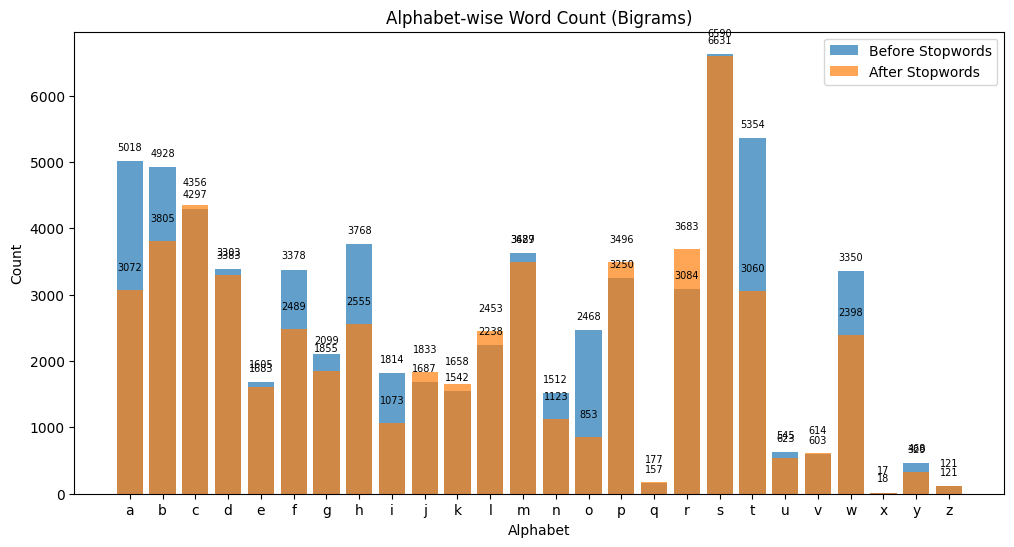

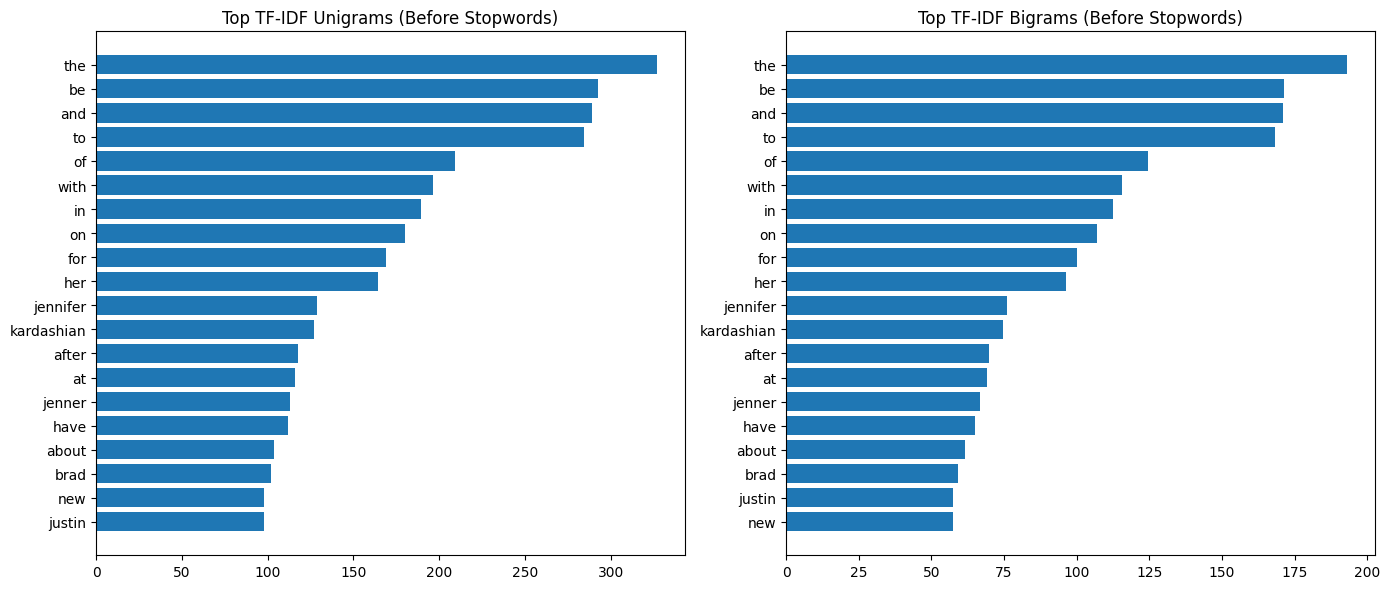

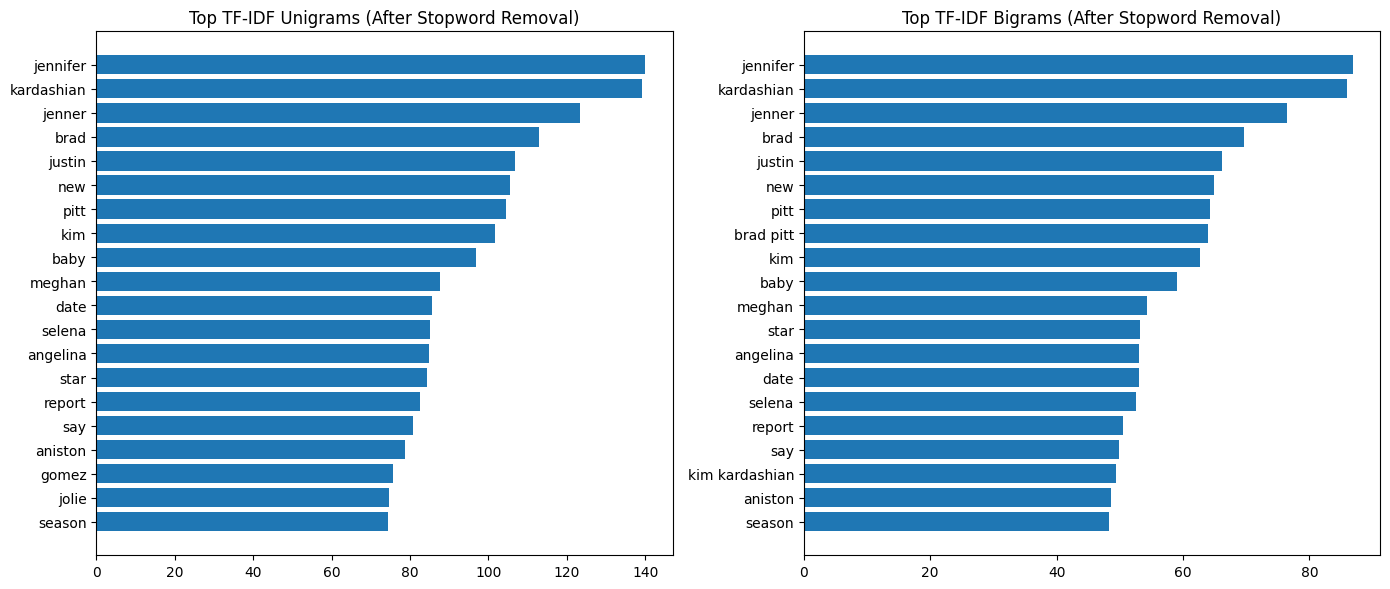


Feature Size Summary
BoW unigrams (no stopwords): 10427
BoW unigrams (with stopwords): 10191
BoW bigrams (no stopwords): 67101
BoW bigrams (with stopwords): 56552
TF-IDF unigrams (no stopwords): 10427
TF-IDF unigrams (with stopwords): 10191
TF-IDF bigrams (no stopwords): 67101
TF-IDF bigrams (with stopwords): 56552

21401012023 - Urvashi Yadav - End


In [ ]:
# Part 4: BoW + TF-IDF (Unigrams & Bigrams, Before/After Stopword Removal)
# Urvashi Yadav - 21401012023

print("21401012023 - Urvashi Yadav - Start\n")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

df = pd.read_csv("processed_for_feature_extraction.csv")
texts = df["text_lemma"].astype(str)

# 1. BAG OF WORDS MODELS

bow_uni_no_sw = CountVectorizer(ngram_range=(1,1))
bow_bi_no_sw = CountVectorizer(ngram_range=(1,2))

bow_uni_sw = CountVectorizer(stop_words='english', ngram_range=(1,1))
bow_bi_sw = CountVectorizer(stop_words='english', ngram_range=(1,2))

bow_uni_no_sw_matrix = bow_uni_no_sw.fit_transform(texts)
bow_bi_no_sw_matrix = bow_bi_no_sw.fit_transform(texts)
bow_uni_sw_matrix = bow_uni_sw.fit_transform(texts)
bow_bi_sw_matrix = bow_bi_sw.fit_transform(texts)

print("\nBoW unigram (no stopwords):", len(bow_uni_no_sw.get_feature_names_out()))
print("BoW bigram (no stopwords):", len(bow_bi_no_sw.get_feature_names_out()))
print("BoW unigram (stopwords removed):", len(bow_uni_sw.get_feature_names_out()))
print("BoW bigram (stopwords removed):", len(bow_bi_sw.get_feature_names_out()))

# 2. TOP WORDS FROM BoW

def top_words_bow(bow_matrix, vectorizer, n=20):
    word_counts = np.asarray(bow_matrix.sum(axis=0)).ravel()
    top_idx = np.argsort(word_counts)[-n:]
    words = vectorizer.get_feature_names_out()[top_idx]
    counts = word_counts[top_idx]
    return words, counts

uni_before_words, uni_before_counts = top_words_bow(bow_uni_no_sw_matrix, bow_uni_no_sw)
bi_before_words, bi_before_counts = top_words_bow(bow_bi_no_sw_matrix, bow_bi_no_sw)
uni_after_words, uni_after_counts = top_words_bow(bow_uni_sw_matrix, bow_uni_sw)
bi_after_words, bi_after_counts = top_words_bow(bow_bi_sw_matrix, bow_bi_sw)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.barh(uni_before_words, uni_before_counts)
plt.title("Top 20 Unigrams (Before Stopword Removal)")
plt.tight_layout()
plt.subplot(1,2,2)
plt.barh(bi_before_words, bi_before_counts)
plt.title("Top 20 Bigrams (Before Stopword Removal)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.barh(uni_after_words, uni_after_counts)
plt.title("Top 20 Unigrams (After Stopword Removal)")
plt.tight_layout()
plt.subplot(1,2,2)
plt.barh(bi_after_words, bi_after_counts)
plt.title("Top 20 Bigrams (After Stopword Removal)")
plt.tight_layout()
plt.show()

# 3. ALPHABET COUNT VISUALIZATION

def alphabet_count(vocab):
    counts = {ch: 0 for ch in string.ascii_lowercase}
    for word in vocab:
        first = word[0]
        if first in counts:
            counts[first] += 1
    return counts

alpha_uni_before = alphabet_count(bow_uni_no_sw.get_feature_names_out())
alpha_uni_after = alphabet_count(bow_uni_sw.get_feature_names_out())

plt.figure(figsize=(12,6))
bars1 = plt.bar(alpha_uni_before.keys(), alpha_uni_before.values(), alpha=0.7, label="Before Stopwords")
bars2 = plt.bar(alpha_uni_after.keys(), alpha_uni_after.values(), alpha=0.7, label="After Stopwords")

plt.title("Alphabet-wise Word Count (Unigrams)")
plt.xlabel("Alphabet")
plt.ylabel("Count")
plt.legend()

offset = max(alpha_uni_before.values()) * 0.02   # 2% vertical offset

for bar in bars1:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + (offset * 2),
        str(height),
        ha='center',
        va='bottom',
        fontsize=8
    )

for bar in bars2:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + (offset),
        str(height),
        ha='center',
        va='bottom',
        fontsize=8,
        color='darkred'   # optional to distinguish
    )

plt.show()

# Alphabet-wise count for bigrams
alpha_bi_before = alphabet_count(bow_bi_no_sw.get_feature_names_out())
alpha_bi_after = alphabet_count(bow_bi_sw.get_feature_names_out())

plt.figure(figsize=(12,6))
bars3 = plt.bar(alpha_bi_before.keys(), alpha_bi_before.values(), alpha=0.7, label="Before Stopwords")
bars4 = plt.bar(alpha_bi_after.keys(), alpha_bi_after.values(), alpha=0.7, label="After Stopwords")

plt.title("Alphabet-wise Word Count (Bigrams)")
plt.xlabel("Alphabet")
plt.ylabel("Count")
plt.legend()

offset = max(alpha_bi_before.values()) * 0.02

for bar in bars3:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + offset, str(height),
             ha='center', va='bottom', fontsize=7)

for bar in bars4:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + (offset * 2), str(height),
             ha='center', va='bottom', fontsize=7)

plt.show()


# 4. TF-IDF MODELS

tfidf_uni_no_sw = TfidfVectorizer(ngram_range=(1,1))
tfidf_bi_no_sw = TfidfVectorizer(ngram_range=(1,2))

tfidf_uni_sw = TfidfVectorizer(stop_words='english', ngram_range=(1,1))
tfidf_bi_sw = TfidfVectorizer(stop_words='english', ngram_range=(1,2))

tfidf_uni_no_sw_matrix = tfidf_uni_no_sw.fit_transform(texts)
tfidf_bi_no_sw_matrix = tfidf_bi_no_sw.fit_transform(texts)
tfidf_uni_sw_matrix = tfidf_uni_sw.fit_transform(texts)
tfidf_bi_sw_matrix = tfidf_bi_sw.fit_transform(texts)

# 5. TOP WORDS FROM TF-IDF

def top_tfidf(tfidf_matrix, vectorizer, n=20):
    tfidf_sum = tfidf_matrix.sum(axis=0).A1
    top_idx = np.argsort(tfidf_sum)[-n:]
    words = vectorizer.get_feature_names_out()[top_idx]
    scores = tfidf_sum[top_idx]
    return words, scores

tfidf_uni_before_words, tfidf_uni_before_scores = top_tfidf(tfidf_uni_no_sw_matrix, tfidf_uni_no_sw)
tfidf_bi_before_words, tfidf_bi_before_scores = top_tfidf(tfidf_bi_no_sw_matrix, tfidf_bi_no_sw)
tfidf_uni_after_words, tfidf_uni_after_scores = top_tfidf(tfidf_uni_sw_matrix, tfidf_uni_sw)
tfidf_bi_after_words, tfidf_bi_after_scores = top_tfidf(tfidf_bi_sw_matrix, tfidf_bi_sw)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.barh(tfidf_uni_before_words, tfidf_uni_before_scores)
plt.title("Top TF-IDF Unigrams (Before Stopwords)")
plt.tight_layout()
plt.subplot(1,2,2)
plt.barh(tfidf_bi_before_words, tfidf_bi_before_scores)
plt.title("Top TF-IDF Bigrams (Before Stopwords)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.barh(tfidf_uni_after_words, tfidf_uni_after_scores)
plt.title("Top TF-IDF Unigrams (After Stopword Removal)")
plt.tight_layout()
plt.subplot(1,2,2)
plt.barh(tfidf_bi_after_words, tfidf_bi_after_scores)
plt.title("Top TF-IDF Bigrams (After Stopword Removal)")
plt.tight_layout()
plt.show()

# 6. SUMMARY

print("\nFeature Size Summary")
print("BoW unigrams (no stopwords):", len(bow_uni_no_sw.get_feature_names_out()))
print("BoW unigrams (with stopwords):", len(bow_uni_sw.get_feature_names_out()))
print("BoW bigrams (no stopwords):", len(bow_bi_no_sw.get_feature_names_out()))
print("BoW bigrams (with stopwords):", len(bow_bi_sw.get_feature_names_out()))
print("TF-IDF unigrams (no stopwords):", len(tfidf_uni_no_sw.get_feature_names_out()))
print("TF-IDF unigrams (with stopwords):", len(tfidf_uni_sw.get_feature_names_out()))
print("TF-IDF bigrams (no stopwords):", len(tfidf_bi_no_sw.get_feature_names_out()))
print("TF-IDF bigrams (with stopwords):", len(tfidf_bi_sw.get_feature_names_out()))

print("\n21401012023 - Urvashi Yadav - End")

In [ ]:
print("21101012023 - Twinkle Kotnala - Start\n")

#Twinkle 21101012023
#Group 5: (211,212,213,214,215,218,222,227,229)
import pandas as pd
import numpy as np
!pip install gensim
from gensim.models import Word2Vec

# Step 1: Load the preprocessed dataset
df = pd.read_csv("processed_for_feature_extraction.csv")
df = df[['clean_title', 'label']].dropna().reset_index(drop=True)

# Step 2: Tokenize the 'clean_title' if not already tokenized (assume space-separated words)
corpus = [title.split() for title in df['clean_title']]

# Step 3: Train Word2Vec model
model = Word2Vec(
    sentences=corpus,
    vector_size=100,
    window=5,
    min_count=2,
    sg=1,
    workers=4,
    seed=42
)

model.save("balanced_title_word2vec.model")

# Step 4: Convert each title to a single document vector (average of its word vectors)
def document_vector(doc):
    doc = [word for word in doc if word in model.wv.key_to_index]
    if len(doc) == 0:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[doc], axis=0)

doc_vectors = np.array([document_vector(article) for article in corpus])

# Step 5: Save document vectors (for modeling/classification)
np.save("balanced_title_doc_vectors.npy", doc_vectors)

# Step 6: (Optional) Print shape and sample
print("Document vectors shape:", doc_vectors.shape)
print("Sample document vector:", doc_vectors[0])

# Step 7: Find and print words most similar to 'fake'
print("Most similar words to 'fake':")
print(model.wv.most_similar("fake"))

print("\n21101012023 - Twinkle Kotnala - End")

21101012023 - Twinkle Kotnala - Start

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 41.9 MB/s eta 0:00:00
Document vectors shape: (10646, 100)
Sample document vector: [-0.01826307 -0.06843818  0.01053298  0.14650464 -0.12542851  0.15954562
 -0.02643683  0.1575333  -0.03728345 -0.02444175 -0.08165159  0.00836526
  0.01961798  0.15147911 -0.12908168 -0.09559863  0.03551865 -0.27193862
 -0.09385628  0.01779228  0.0667971   0.08502532 -0.06198249  0.23054314
  0.13592878 -0.0043822  -0.08414849  0.07180319 -0.1088018  -0.1002028
  0.03103791 -0.07756513 -0.06117117  0.03251087  0.04186133 -0.07818937
  0.11022962 -0.24440016 -0.064999    0.12735595  0.06455664 -0.04161518
  0.18274282  0.01153168  0.02806833  0.01435967  0.19638026  0.18067478
  0.16021177 -0.08039337 -0.04378548 -0.31854558  0.0273446   0.01979617
  0.13798992  0.05495679 -0.12362965  0.09607383 -0.01299801  0.15414874
 -0.03820239  0.04429174 -0.13719754  0.13619328  0.06408753  0.09122121
  0.02083051 -0.066

In [ ]:
# Udiksha Soalnki 21201012023
# Download GloVe embeddings (if not already present)
print("21201012023 - Udiksha Solanki - Start\n")

!wget -nc http://nlp.stanford.edu/data/glove.6B.zip
!unzip -n glove.6B.zip

import numpy as np

def load_glove_embeddings(glove_file_path):
    embeddings = {}
    with open(glove_file_path, 'r', encoding='utf8') as f:
        for line in f:
            values = line.strip().split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Example: 'glove.6B.50d.txt' or 'glove.6B.100d.txt'
glove_50d = load_glove_embeddings("glove.6B.50d.txt")
# Or for 100d: glove_100d = load_glove_embeddings("glove.6B.100d.txt")
print(f"Loaded {len(glove_50d)} GloVe 50d embeddings.")

21201012023 - Udiksha Solanki - Start

--2025-11-22 09:59:11--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-11-22 09:59:12--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-11-22 09:59:12--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [applicati

In [ ]:
#Udiksha Solanki 21201012023
#2. Create Embedding Matrix
import pandas as pd
import re

# Combine data for embedding creation
df = pd.read_csv("processed_for_feature_extraction.csv")
texts = df["text_lemma"].astype(str).tolist()

# Tokenize and build vocab
def tokenize(text):
    return re.findall(r"\b\w+\b", text.lower())

word_set = set()
for text in texts:
    word_set.update(tokenize(text))

word_list = sorted(list(word_set))
word_index = {word: idx for idx, word in enumerate(word_list)}

# Create embedding matrix for 50d
embedding_dim = 50
embedding_matrix = np.zeros((len(word_index), embedding_dim))
for word, i in word_index.items():
    vector = glove_50d.get(word)
    if vector is not None:
        embedding_matrix[i] = vector

# embedding_matrix: rows = vocab words, cols = GloVe vector dimensions

In [ ]:
#Udiksha Solanki 21201012023
#3. Compare with Word2Vec
from gensim.models import Word2Vec

# Tokenize all sentences for Word2Vec
tokenized_texts = [tokenize(t) for t in texts]
w2v_model = Word2Vec(sentences=tokenized_texts, vector_size=50, window=5, min_count=1, workers=4)

# Create embedding matrix for Word2Vec (same vocab/structure as GloVe)
w2v_embedding_matrix = np.zeros((len(word_index), 50))
for word, i in word_index.items():
    if word in w2v_model.wv:
        w2v_embedding_matrix[i] = w2v_model.wv[word]

In [ ]:
#Udiksha Solanki 21201012023
# Feature Extraction
# For each 'title', get the mean of word vectors (GloVe and Word2Vec versions)
def vectorize_text(text, word_index, embedding_matrix):
    tokens = tokenize(text)
    indices = [word_index[token] for token in tokens if token in word_index]
    if indices:
        return np.mean(embedding_matrix[indices], axis=0)
    else:
        return np.zeros(embedding_matrix.shape[1])
df['glove_feat'] = df['text_lemma'].apply(lambda x: vectorize_text(x, word_index, embedding_matrix))
df['w2v_feat'] = df['text_lemma'].apply(lambda x: vectorize_text(x, word_index, w2v_embedding_matrix))

# Now 'glove_feat' and 'w2v_feat' columns hold the text features extracted by each embedding method

print("\n21201012023 - Udiksha Solanki - End")


21201012023 - Udiksha Solanki - End


In [ ]:
print("22901012023 - Zoya Rizvi - Start\n")

#Zoya Rizvi 22901012023
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load preprocessed, lemmatized text & label
df = pd.read_csv("processed_for_feature_extraction.csv")
X_text = df["text_lemma"].astype(str)
y = df["label"].values.astype(int)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(X_text).toarray()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Build the ANN classifier
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the ANN
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\n22901012023 - Zoya Rizvi - End")

22901012023 - Zoya Rizvi - Start



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.6737 - loss: 0.6050 - val_accuracy: 0.7923 - val_loss: 0.4566
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8690 - loss: 0.3252 - val_accuracy: 0.7782 - val_loss: 0.4808
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9118 - loss: 0.2283 - val_accuracy: 0.7559 - val_loss: 0.5894
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9537 - loss: 0.1320 - val_accuracy: 0.7523 - val_loss: 0.7355
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9764 - loss: 0.0682 - val_accuracy: 0.7688 - val_loss: 0.8864
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9868 - loss: 0.0389 - val_accuracy: 0.7512 - val_loss: 1.0808
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9915 - loss: 0.0237 - val_accuracy: 0.7500 - val_loss: 1.2084
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9910 - loss: 0.0205 - val_accura

In [ ]:
print("22701012023 - Yogita - Start\n")

#Yogita 22701012023
# Imports
!pip install deap
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms
import random

22701012023 - Yogita - Start

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.0/136.0 kB 9.4 MB/s eta 0:00:00


In [ ]:
# Load dataset
df = pd.read_csv("processed_for_feature_extraction.csv")
X_text = df["text_lemma"].astype(str)
y = df["label"].values

# TF-IDF
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(X_text).toarray()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Baseline model accuracy (no GA)

baseline_model = LogisticRegression(max_iter=300)
baseline_model.fit(X_train, y_train)
baseline_pred = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, baseline_pred)

print("\nBaseline Accuracy (without GA):", baseline_accuracy)

# GENETIC ALGORITHM SETUP

n_features = X_train.shape[1]

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()


Baseline Accuracy (without GA): 0.7821596244131456


In [ ]:
# Binary chromosome (0 or 1 for each feature)
toolbox.register("attr_bool", lambda: random.randint(0, 1))
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_bool, n_features)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Fitness Function
def eval_features(individual):
    selected_idx = [i for i, bit in enumerate(individual) if bit == 1]

    if len(selected_idx) == 0:
        return 0.,

    X_train_sel = X_train[:, selected_idx]
    X_test_sel = X_test[:, selected_idx]

    model = LogisticRegression(max_iter=200)
    model.fit(X_train_sel, y_train)
    pred = model.predict(X_test_sel)

    return accuracy_score(y_test, pred),

toolbox.register("evaluate", eval_features)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.01)
toolbox.register("select", tools.selTournament, tournsize=3)

In [ ]:
# RUN GENETIC ALGORITHM
population = toolbox.population(n=20)
N_GEN = 15   # number of generations

final_pop, log = algorithms.eaSimple(
    population, toolbox,
    cxpb=0.5, mutpb=0.2,
    ngen=N_GEN,
    verbose=False
)

# Best solution
best_ind = tools.selBest(final_pop, 1)[0]
selected_features = [i for i, bit in enumerate(best_ind) if bit == 1]

print("\nGA Selected Features:", selected_features)
print("Number of selected features:", len(selected_features))


GA Selected Features: [4, 5, 7, 8, 9, 11, 12, 14, 18, 21, 23, 30, 31, 32, 34, 35, 37, 38, 41, 42, 43, 44, 46, 49, 50, 51, 52, 53, 54, 57, 58, 59, 60, 62, 64, 68, 70, 72, 73, 74, 75, 77, 78, 79, 80, 83, 84, 85, 90, 94, 96, 97, 98, 99, 100, 103, 104, 108, 113, 116, 119, 122, 124, 125, 128, 129, 138, 140, 144, 146, 147, 148, 151, 155, 156, 157, 158, 159, 162, 164, 165, 166, 167, 168, 169, 170, 171, 173, 174, 176, 181, 182, 184, 189, 190, 194, 200, 202, 203, 206, 210, 212, 214, 217, 219, 220, 222, 223, 224, 226, 227, 228, 232, 233, 234, 236, 237, 242, 243, 244, 246, 248, 252, 254, 258, 259, 260, 261, 263, 264, 266, 269, 270, 271, 275, 278, 279, 280, 281, 282, 286, 288, 289, 291, 295, 297, 298, 300, 301, 303, 304, 305, 307, 309, 310, 314, 315, 316, 319, 320, 321, 323, 325, 334, 335, 336, 337, 338, 339, 340, 341, 342, 345, 346, 347, 349, 351, 352, 353, 355, 356, 357, 360, 364, 366, 369, 372, 373, 379, 381, 382, 383, 385, 386, 390, 392, 393, 394, 395, 396, 397, 400, 401, 402, 403, 404, 406, 

In [ ]:
# Train model on GA-selected features

X_train_sel = X_train[:, selected_idx]
X_test_sel = X_test[:, selected_idx]

model_ga = LogisticRegression(max_iter=300)
model_ga.fit(X_train_sel, y_train)
pred_ga = model_ga.predict(X_test_sel)

ga_accuracy = accuracy_score(y_test, pred_ga)
np.save("selected_features.npy", np.array(selected_features))

print("\nAccuracy After GA Feature Selection:", ga_accuracy)
print("IMPROVEMENT:", ga_accuracy - baseline_accuracy)

print("\n22701012023 - Yogita - End")


Accuracy After GA Feature Selection: 0.7661971830985915
IMPROVEMENT: -0.015962441314554043

22701012023 - Yogita - End


In [ ]:
# 21301012023 - Urvashi
print("21301012023 - Urvashi - Start\n")
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# ---------------------------------------------
# LOAD PROCESSED DATA CREATED BY MEMBERS 1–2
# ---------------------------------------------
df = pd.read_csv("processed_for_feature_extraction.csv")

texts = df["text_lemma"].astype(str).tolist()
y = df["label"].astype(int).values

# ---------------------------------------------
# LOAD TF-IDF MATRIX CREATED BY MEMBER-3/4
# ---------------------------------------------
# IMPORTANT: Member 3/4 should have saved X_tfidf.npy earlier
# (If not saved earlier, just recompute TF-IDF again)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(texts).toarray()

# ---------------------------------------------
# LOAD GA-SELECTED FEATURES FROM MEMBER-8
# ---------------------------------------------
# Member-8 must save selected_features.npy
selected_features = np.load("selected_features.npy")
print("GA Selected Features Count:", len(selected_features))

# select only GA-approved TF-IDF columns
X_tfidf_selected = X_tfidf[:, selected_features]

# ---------------------------------------------
# LOAD WORD2VEC DOCUMENT VECTORS FROM MEMBER-6
# ---------------------------------------------
# Member-6 should have saved: w2v_vectors.npy
X_w2v = np.load("balanced_title_doc_vectors.npy")
print("Word2Vec Shape:", X_w2v.shape)

# ---------------------------------------------
# TRAIN-TEST SPLIT
# ---------------------------------------------
X_train_tf, X_test_tf, y_train, y_test = train_test_split(
    X_tfidf_selected, y, test_size=0.2, random_state=42, stratify=y
)

X_train_w2v, X_test_w2v, _, _ = train_test_split(
    X_w2v, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------------------------
# SCALE EACH PART SEPARATELY
# ---------------------------------------------
sc1 = StandardScaler()
X_train_tf_s = sc1.fit_transform(X_train_tf)
X_test_tf_s  = sc1.transform(X_test_tf)

sc2 = StandardScaler()
X_train_w2v_s = sc2.fit_transform(X_train_w2v)
X_test_w2v_s  = sc2.transform(X_test_w2v)

# ---------------------------------------------
# HYBRID FEATURE CONCATENATION
# ---------------------------------------------
X_train_hybrid = np.hstack([X_train_tf_s, X_train_w2v_s])
X_test_hybrid  = np.hstack([X_test_tf_s,  X_test_w2v_s])

print("Hybrid Feature Shape:", X_train_hybrid.shape)

# ---------------------------------------------
# FINAL ANN CLASSIFIER
# ---------------------------------------------
model = Sequential([
    Dense(256, activation='relu', input_dim=X_train_hybrid.shape[1]),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

print("\nTraining Hybrid ANN...")
model.fit(X_train_hybrid, y_train, epochs=6, batch_size=128, validation_split=0.1, verbose=1)

# ---------------------------------------------
# PREDICTION & METRICS
# ---------------------------------------------
pred = (model.predict(X_test_hybrid) > 0.5).astype(int).flatten()

acc = accuracy_score(y_test, pred)
prec = precision_score(y_test, pred, zero_division=0)
rec = recall_score(y_test, pred, zero_division=0)
f1 = f1_score(y_test, pred, zero_division=0)

print("\n===== MEMBER 9 HYBRID RESULTS =====")
print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1-score :", f1)

21301012023 - Urvashi - Start

GA Selected Features Count: 1010
Word2Vec Shape: (10646, 100)
Hybrid Feature Shape: (8516, 1110)

Training Hybrid ANN...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6354 - loss: 0.7374 - val_accuracy: 0.7230 - val_loss: 0.5435
Epoch 2/6
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7534 - loss: 0.5286 - val_accuracy: 0.7265 - val_loss: 0.5516
Epoch 3/6
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7867 - loss: 0.4514 - val_accuracy: 0.7324 - val_loss: 0.5599
Epoch 4/6
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8033 - loss: 0.4288 - val_accuracy: 0.7242 - val_loss: 0.5662
Epoch 5/6
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8098 - loss: 0.4043 - val_accuracy: 0.7324 - val_loss: 0.5837
Epoch 6/6
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8165 - loss: 0.3922 - val_accuracy: 0.7347 - val_loss: 0.6026
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

===== MEMBER 9 HYBRID RESULTS =====
Accuracy : 0.7469483568075117
Precision: 0.7603960396039604
Recall   : 0.7211267605633803
F1-score : 0.7402409638554217
